In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
import pylab as py 
import statsmodels.api as sm
import scipy


pd.options.display.max_rows = 100
%matplotlib inline


pot_do_podatkov = os.path.join('D:\Faks\Projektna_analiza_podatkov\Analiza-furryjev', 'furs_podatki')

furs = pd.read_csv(pot_do_podatkov)
Count_species = furs.groupby('Species').size().sort_values(ascending=False)
Count_owner_g = furs.groupby('Owner_Gender').size().sort_values(ascending=False)
Count_fur_g = furs.groupby('Fur_Gender').size().sort_values(ascending=False)
Count_countries = furs.groupby('Country').size().sort_values(ascending=False)
furs

,Name,Date_Fursuit_Added,Species,Fur_Gender,Owner_Gender,Birthday,Date_Account_Added,Country
0,Edragyz,2014-07-21,pokemon,CrossGender,Male,NaN,2014-05-29,Zaire
1,Latlevy,2014-07-21,pokemon,CrossGender,Male,NaN,2014-05-29,Zaire
2,Nrevion,2014-07-21,pokemon,CrossGender,Male,NaN,2014-05-29,Zaire
3,Tabion,2014-07-21,bat,CrossGender,Male,NaN,2014-05-29,Zaire
4,Uillian O Gerra,2012-06-01,bear,Male,Male,1987-05-08,2012-06-01,Ireland
...,...,...,...,...,...,...,...,...
4396,Zuki Akula,2007-12-24,gargoyle,Male,Male,1969-08-24,2007-10-05,United Kingdom
4397,Zunami,2010-10-12,wolf,Male,Male,1985-12-20,2010-10-12,Germany
4398,Zuni,2013-06-06,arctic fox,Male,Female,1994-12-01,2013-06-06,United States of America
4399,Zutharr SuiTiger,2010-09-26,tiger,Male,Male,1983-03-02,2007-12-27,Brazil


## Število živalskih vrst 
Za začetek si oglejmo najpogostejše vrste živali.  
Predpostavil sem, da bodo najpogostejše živali iz redu zveri, kar podatki, z izjemo zmaja na petem mestu, potrjujejo.  
Naslednje vrste, ki izstopajo iz tega vzorca, so zajec na trinajstem, kenguru na sedemnajstem in konj na devetnajstem mestu.

In [8]:
Count_species.head(20)

Species
wolf               483
fox                426
dog                307
husky              265
dragon             204
cat                172
lion               103
tiger               98
coyote              79
german shepherd     64
bear                62
raccoon             54
bunny               52
skunk               49
hyena               46
fennec              46
kangaroo            44
arctic fox          43
horse               43
snow leopard        42
dtype: int64

Najredkejše živalske vrste si težko sistematsko ogledamo,
saj se velik del vrst pojavi le nekajkrat in najpogosteje samo enkrat.

In [9]:
def equals1(x):
    return x == 1

Filter = Count_species.apply(equals1)
len(Count_species[Filter])

60

Vprašamo se lahko torej o porazdelitvi vrst glede na pogostost, pred tem pa si oglejmo še graf števila pojavitev vsake vrste.  
Za lažjo berljivost sem odstranil oznake na x osi, predstavljene so vrednosti za 225 različnih vrst.

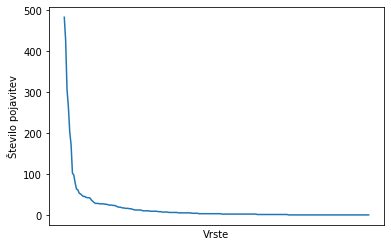

In [10]:
plt.plot(Count_species)
plt.xticks([])
plt.xlabel('Vrste')
plt.ylabel('Število pojavitev')
plt.show()

Kot sem predpostavil, graf spominja na obratno sorazmerno krivuljo  y = k/x + m, kjer je y število pojavitev, x indeks vrste po pogostosti, k in m pa konstanti.  

Najbolj ustrezni konstanti lahko poiščemo tako, da poiščemo linearno funkcijo, ki se najbolje prilega obratnim vrednostim pojavitev, pred tem pa odstranimo še vse vrste, ki se pojavijo le enkrat, saj bi povzročile prevelik odstop.

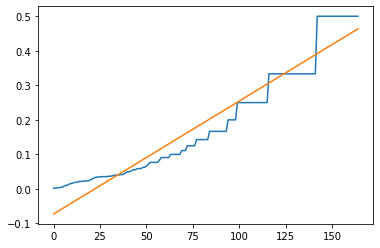

0.9609359867074135


In [11]:
def notequals1(x):
    return x > 1
Filter = Count_species.apply(notequals1)
Bigger = Count_species[Filter]


def obratna(x):
    return 1/x

Values = Bigger.apply(obratna).tolist()
Indicies = list(range(1,166))
k, m, r, _, _ = scipy.stats.linregress(Indicies, Values)

def fun(x):
    return k*x + m
Funkcijske = pd.Series(Indicies).apply(fun)

plt.plot(Values)
plt.plot(Funkcijske)
plt.show()
print(r)

Iz r vrednosti 0.9609 lahko sklepamo, da se vrednosti dobro prilegajo dobljeni linearni funkciji.  
Oglejmo si še obratno sorazmerna grafa.

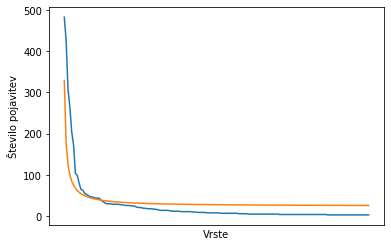

In [12]:
def fun2(x):
    return 1/(k*x) - m/k 
Funkcijske2 = pd.Series(Indicies).apply(fun2)

plt.plot(Bigger)
plt.plot(Funkcijske2)
plt.xticks([])
plt.xlabel('Vrste')
plt.ylabel('Število pojavitev')
plt.show()

Vidimo, da se dobljena funkcija relativno dobro prilega podatkom. To potrjuje hipotezo.

## Država prebivališča
Hitro si oglejmo še države prebivališča uporabnikov.

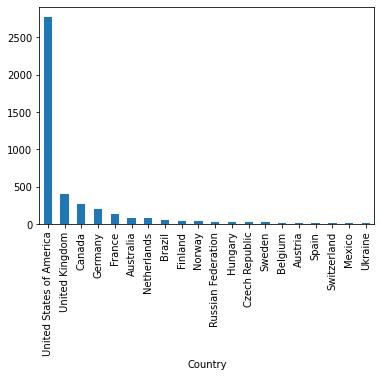

0.6305978631507161


In [31]:
Count_countries.head(20).plot.bar()
plt.show()
print(Count_countries["United States of America"]/Count_countries.sum())

Štiri od šestih najpogstejših držav je angleško goverečih, kar je bilo pričakovati, saj je spletna stran sama v angleškem jeziku.  
Kar 63% vseh uporabnikov je iz ZDA, lahko pa poskusimo primerjati še števila uporabnikov, deljena z populacijo države.

In [33]:
USA = Count_countries["United States of America"]/328200
UK = Count_countries["United Kingdom"]/66650
Canada = Count_countries["Canada"]/37590
Germany = Count_countries["Germany"]/83020
France = Count_countries["France"]/67060
print(USA,UK,Canada, Germany, France)

0.008452163315051798 0.006031507876969242 0.006969938813514233 0.0024451939291736933 0.002072770653146436


Vrednosti prvih treh držav so relativno primerljive, naslednji dve pa dokaj upadeta. To bi lahko zopet pripisali temu, da je angleški jezik edina možnost na analizirani spletni strani.  

## Spol furson in njihovih lastnikov
Za začetek si oglejmo histograma spolov uporabnikov in njihovih furson.

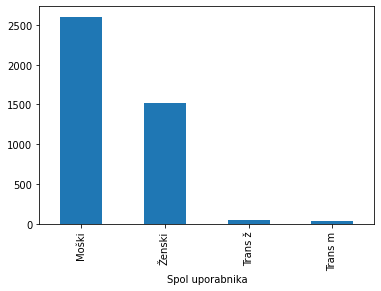

In [13]:
Count_owner_g.plot.bar()
plt.xticks([0,1,2,3],["Moški", "Ženski", "Trans ž", "Trans m"])
plt.xlabel('Spol uporabnika')
plt.show()

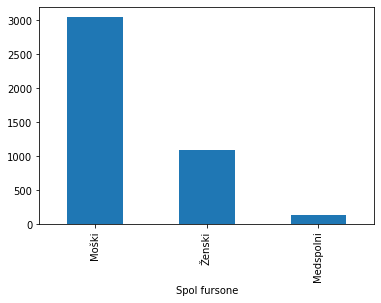

In [14]:
Count_fur_g.plot.bar()
plt.xticks([0,1,2],["Moški", "Ženski", "Medspolni"])
plt.xlabel('Spol fursone')
plt.show()

V obeh primerih v množini prevladuje moški spol. Zanimivo pa je, da na drugem histogramu število moških še naraste, število žensk pa pade za približno enako število.  
Zdi se, da večina uporabnikov moškega spola izbira fursone z istim spolom, doberšen del uporabnic ženskega spola pa z drugim. Oglejmo si ta pojav malo podrobneje.

In [15]:
def is_male(x):
    return x == "Male" or x == "Trans FM"
def is_female(x):
    return x == "Female" or x == "Trans MF"

Filter1 = furs["Owner_Gender"].apply(is_male)
Filtered1 = furs[Filter1].groupby('Fur_Gender').size().sort_values(ascending=False).to_frame("Male users")

Filter2 = furs["Owner_Gender"].apply(is_female)
Filtered2 = furs[Filter2].groupby('Fur_Gender').size().sort_values(ascending=False).to_frame("Female users")

Filtered1.merge(Filtered2, on='Fur_Gender')

,Male users,Female users
Fur_Gender,,
Male,2439,522
Female,117,958
CrossGender,58,69


In [16]:
(117+58)/(2439+117+58)

0.06694720734506504

In [17]:
(522+69)/(958+522+69)

0.381536475145255

Ocena na prvi pogled se je izkazala za pravilno. Za fursono drugačnega spola se odloči 38% uporabnic a le 7% uporabnikov.  
Transspolnih uporabnikov je premalo, da bi jih lahko ločeno analizirali, zdi pa se, da sledijo podobnemu vzorcu kot cis uporabniki.

Sedaj pa si oglejmo še, ali spol uporabnika kako vpliva na izbiro vrste.

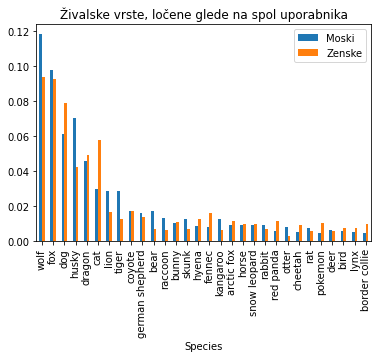

In [18]:
def procent_men_u(x):
    return x/2639
def procent_women_u(x):
    return x/1551

Moski_u = furs[Filter1].groupby('Species').size().apply(procent_men_u).to_frame(name="Moski")
Zenske_u = furs[Filter2].groupby('Species').size().apply(procent_women_u).to_frame(name="Zenske")
Ordered_u = Count_species.to_frame().merge(Moski_u, how='left', on='Species').merge(Zenske_u, how='left', on='Species')
Ordered_u[["Moski", "Zenske"]].head(30).plot.bar()
plt.title("Živalske vrste, ločene glede na spol uporabnika")
plt.show()

Zdi se, da se uporabnice ženskega spola bolj nagibajo proti mačkam-podobnim živalim kot so mačka, hijena, fennec, rdeča panda, gepard in ris, uporabniki moškega spola pa proti večjim in bolj raznolikim živalim kot so volk, lev, tiger, medved, rakun, dihur, kenguru in vidra.  
Morda je malo čudno, da sta med največjimi skupinami pes in husky, saj je husky prav tako pes, iz podatkov pa je razvidno, da so moški bolj nagnjeni k izbiri huskyja, ženske pa k izbiri bolj splošnega psa.

Prepostavil sem le, da bo obstajala nekakšna korelacija med spolom in živalsko vrsto. Med spoloma ni velikega razkola, mislim pa, da doberšne razlike pri nekaj izmed najpogostejših vrst hipotezo potrdijo.

## Starosti uporabnikov
Najprej si oglejmo trenutne starosti uporabnikov strani.

21.0


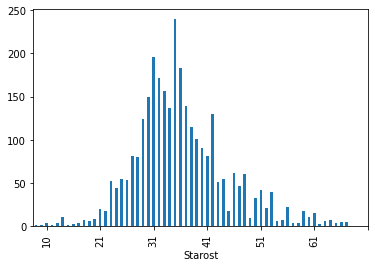

In [19]:
def youre_not_that_old(x):
    return x < 100
def age(date):
    return 2021 - int(date[0:4])
Dates = furs["Birthday"].dropna().apply(age)
Filter5 = Dates.apply(youre_not_that_old)
Filtered5 = Dates[Filter5]
Ages = pd.DataFrame(Filtered5).groupby("Birthday").size()
Ages.plot.bar()
print(Ages.median())
plt.xticks(np.arange(2, 67, step=10))
plt.xlabel('Starost')
plt.show()

Kot pričakovano, je distribucija starosti normalna, do vrha pa pride nekje v zgodnjih 30ih letih, z nekaj odstopanja.  
Za konec pa si oglejmo še distribucijo starosti, ko so uporabniki kupili svoj fursuit.

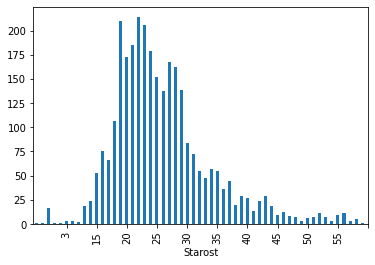

In [38]:
def year(date):
    return int(date[0:4])

def exists(x):
    return bool(x)

Filter_added = furs["Date_Fursuit_Added"].fillna(False).apply(exists)
Filter_birthday = furs["Birthday"].fillna(False).apply(exists)
furs_ima_oboje = furs[Filter_added & Filter_birthday & Filter5]

Kupili = furs_ima_oboje["Date_Fursuit_Added"].apply(year).tolist()
Rodili = furs_ima_oboje["Birthday"].apply(year).tolist()

def subtract_lists(l1, l2):
    difference = []
    zipped = zip(l1, l2)
    for i, j in zipped:
        difference.append(i - j)
    return difference

Razlika = pd.Series(subtract_lists(Kupili, Rodili), name="Starost")
Ages2 = pd.DataFrame(Razlika).groupby("Starost").size()
Ages2.plot.bar()
plt.xticks(np.arange(5, 60, step=5))
plt.show()

Tudi ta distribucija je videti normalna, vendar je rahlo zamaknjena v levo. Moja hipoteza, da bodo uporabniki fursuit kupili v svojih srednjih dvajsetih letih, pa se je izkazala za ne povsem pravilno. Videti je, da se vrh nahaja nekje med zgodnjimi dvajsetimi in poznimi najstniškimi leti.

Za pridobitev teh starosti sem privzel, da so uporabniki fursuit na spletno stran objavili v letu, ko so ga kupili in odštel to leto od leta njihovega rojstva. To je povzročilo nekaj anomalij, kot so starosti med -2 in 10 let, sem pa mnenja, da je predpostavka razumna in pridobljeni graf smiselen, čeprav ne povsem točen.

## Povzetek
Mislim, da sem uspel iz pridobljenih podatkov pridobiti nekaj pričakovanih in nekaj zanimivih zaključkov.  
Naj povzamem še hipoteze,
- Med spolom uporabnika in vrsto živali obstaja manjša korelacija, do veliko večje korelacije pa je prišlo med spolom uporabnika in spolom njegove fursone
- Večina najpogostejših vrst je res iz redu zveri
- Povprečen uporabnik ne kupi fursuita v srednjih, temveč v zgodnjih dvajsetih letih.
- Živali, rangirane po popularnosti, res tvorijo obratno sorazmerno krivuljo